# Notebook 3 - Visualisation

In [1]:
# Notebook 3 — Interpret embedding space

import os, pickle
from pathlib import Path

import numpy as np
import pandas as pd
import umap
import matplotlib.pyplot as plt

# --- paths ---
PROJECT = Path(r"C:\Users\ratne\Downloads\Helical_Challenge")
EMB_DIR = PROJECT / "results" / "embeddings"
ISP_DIR = PROJECT / "results" / "isp_als"

combined_path = EMB_DIR / "ALS_unperturbed_with_meta.csv"

print("Combined CSV exists:", combined_path.exists(), "->", combined_path)

# load combined embeddings + metadata you created earlier
combined = pd.read_csv(combined_path, index_col=0)
print("combined shape:", combined.shape)
combined.head()


c:\Users\ratne\Downloads\Helical_Challenge\helical_challenge_venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Combined CSV exists: True -> C:\Users\ratne\Downloads\Helical_Challenge\results\embeddings\ALS_unperturbed_with_meta.csv
combined shape: (1000, 774)


,Condition,Group,CellClass,CellType,SubType,split,emb_0,emb_1,emb_2,emb_3,...,emb_758,emb_759,emb_760,emb_761,emb_762,emb_763,emb_764,emb_765,emb_766,emb_767
Barcode,,,,,,,,,,,,,,,,,,,,,
GTCGTTCTCTGTGCAA-118MCX,ALS,SALS,Ex,L6,TLE4_SEMA3D,train,0.024868,-0.118322,-0.104733,-0.228727,...,-0.528719,-0.137115,-0.114696,0.110082,-0.078810,-0.241094,0.440791,-0.215314,-0.055313,0.032509
GGGCTCATCTGGGAGA-126MCX,ALS,SALS,In,PV,PVALB_CEMIP,train,0.043460,-0.142153,-0.175090,-0.254710,...,-0.470818,-0.211254,-0.121203,0.100071,-0.064720,-0.207777,0.470039,-0.184062,-0.068320,0.024948
GTAACACTCGTCCATC-303MCX,PN,PN,Ex,L5_L6,THEMIS_TMEM233,train,0.038716,-0.102060,-0.108188,-0.231725,...,-0.489459,-0.151722,-0.086471,0.100692,-0.091844,-0.229847,0.489524,-0.214918,-0.053846,0.075414
AGCCAGCGTCGTTCAA-116MCX,ALS,SALS,Ex,L6,TLE4_MEGF11,train,0.034691,-0.128403,-0.140141,-0.236448,...,-0.470175,-0.187985,-0.104190,0.077863,-0.083059,-0.215005,0.463036,-0.218762,-0.046391,0.048188
ATTCGTTTCAAGCTGT-309MCX,PN,PN,Ex,L2_L3,CUX2_RASGRF2,train,0.059822,-0.109191,-0.136661,-0.223937,...,-0.439917,-0.166989,-0.095249,0.100612,-0.098669,-0.227109,0.474205,-0.201083,-0.051931,0.044647


In [2]:
# grab just the embedding columns
emb_cols = [c for c in combined.columns if c.startswith("emb_")]
X = combined[emb_cols].values

print("Embedding matrix for UMAP:", X.shape)

# UMAP in cosine space 
reducer = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    metric="cosine",
    random_state=42,
)
umap_coords = reducer.fit_transform(X)

combined["UMAP1"] = umap_coords[:, 0]
combined["UMAP2"] = umap_coords[:, 1]

print("Added UMAP1/UMAP2 to combined.")
combined[["UMAP1", "UMAP2"]].head()


Embedding matrix for UMAP: (1000, 768)


c:\Users\ratne\Downloads\Helical_Challenge\helical_challenge_venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Added UMAP1/UMAP2 to combined.


,UMAP1,UMAP2
Barcode,,
GTCGTTCTCTGTGCAA-118MCX,1.716666,-1.069313
GGGCTCATCTGGGAGA-126MCX,1.915085,-3.991841
GTAACACTCGTCCATC-303MCX,0.658855,-2.148267
AGCCAGCGTCGTTCAA-116MCX,2.159229,-3.303974
ATTCGTTTCAAGCTGT-309MCX,1.685398,-3.467868


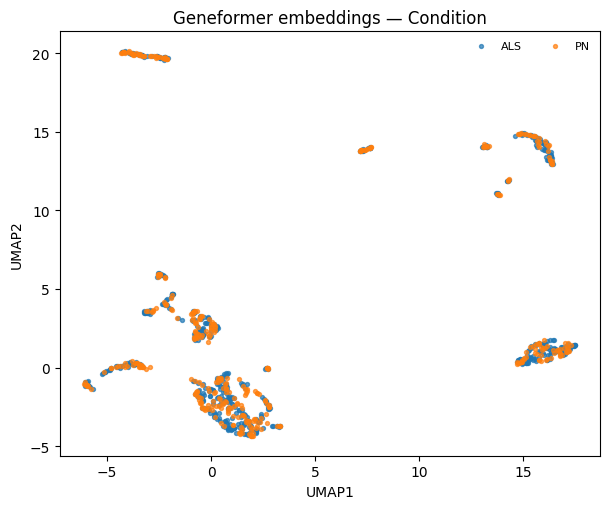

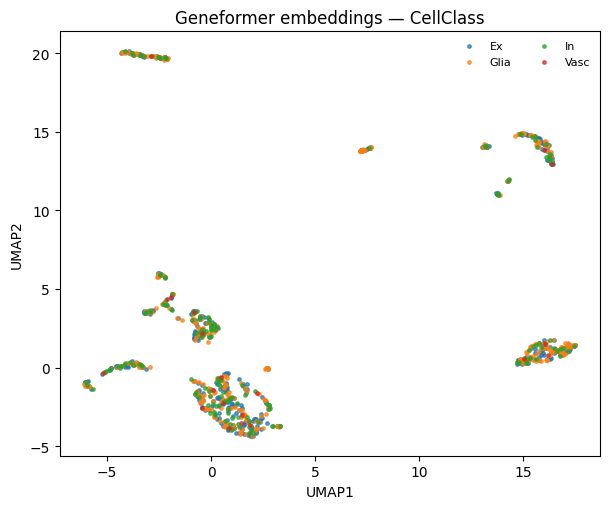

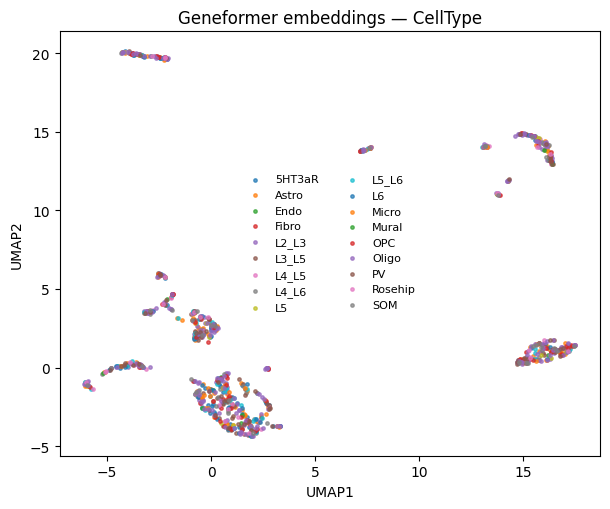

In [3]:
def scatter_by(col, title=None, s=8):
    if col not in combined.columns:
        print(f"Column '{col}' not in combined.")
        return
    
    fig, ax = plt.subplots(figsize=(6.2, 5.2))
    for key, sub in combined.groupby(col):
        ax.scatter(
            sub["UMAP1"], sub["UMAP2"],
            s=s, alpha=0.7, label=str(key)
        )
    ax.set_xlabel("UMAP1")
    ax.set_ylabel("UMAP2")
    ax.set_title(title or f"UMAP coloured by {col}")
    ax.legend(frameon=False, fontsize=8, ncols=2)
    plt.tight_layout()
    plt.show()

# examples: by disease status and by cell class
if "Condition" in combined.columns:
    scatter_by("Condition", "Geneformer embeddings — Condition")

if "CellClass" in combined.columns:
    scatter_by("CellClass", "Geneformer embeddings — CellClass", s=6)

if "CellType" in combined.columns:
    scatter_by("CellType", "Geneformer embeddings — CellType", s=6)


In [4]:
def load_isp_scalar_vector(path: Path) -> np.ndarray:
    """
    Load one ISP pickle and return a 1D np.array of per-cell scalar values
    (e.g. cosine shift). Assumes value is stored under a (layer, 'cell_emb') key.
    """
    with open(path, "rb") as fh:
        d = pickle.load(fh)
    # find the (layer, 'cell_emb') key
    key = next(
        (k for k in d.keys() if isinstance(k, tuple) and "cell_emb" in k[1]),
        None,
    )
    if key is None:
        raise ValueError(f"No (layer, 'cell_emb') key in {path.name}")
    arr = np.array(d[key])
    if arr.ndim != 1:
        raise ValueError(f"Expected 1D vector in {path.name}, got {arr.shape}")
    return arr

def attach_isp_columns(pattern: str, col_prefix: str):
    """
    Attach all ISP files matching 'pattern' in ISP_DIR as columns to `combined`.
    One column per file; names like f'{col_prefix}_01', f'{col_prefix}_02', etc.
    """
    files = sorted(ISP_DIR.glob(pattern))
    if not files:
        print("No ISP files matching:", pattern)
        return []

    added_cols = []
    for i, f in enumerate(files, 1):
        try:
            vec = load_isp_scalar_vector(f)
            if len(vec) != len(combined):
                print(f"⚠ length mismatch for {f.name}: {len(vec)} vs {len(combined)} — skipping")
                continue
            col = f"{col_prefix}_{i:02d}"
            combined[col] = vec
            added_cols.append(col)
            print(f"Added {col} from {f.name}")
        except Exception as e:
            print("Skipping", f.name, "->", e)
    return added_cols

# attach KD (delete) and KU (overexpress) results
kd_cols = attach_isp_columns("in_silico_delete_ALS_KD_*cell_embs_dict*pickle", "KD")
ku_cols = attach_isp_columns("in_silico_overexpress_ALS_KU_*cell_embs_dict*pickle", "KU")

print("KD columns:", kd_cols)
print("KU columns:", ku_cols)


⚠ length mismatch for in_silico_delete_ALS_KD_b001_cell_embs_dict_[8090, 5072, 1825, 8907, 5307]_raw.pickle: 8 vs 1000 — skipping
⚠ length mismatch for in_silico_delete_ALS_KD_b002_cell_embs_dict_[14929]_raw.pickle: 364 vs 1000 — skipping
Added KU_01 from in_silico_overexpress_ALS_KU_b001_cell_embs_dict_[8090, 5072, 1825, 8907, 5307]_raw.pickle
Added KU_02 from in_silico_overexpress_ALS_KU_b002_cell_embs_dict_[14929]_raw.pickle
KD columns: []
KU columns: ['KU_01', 'KU_02']


In [5]:
print("KU columns:", ku_cols)
combined[ku_cols].describe()


KU columns: ['KU_01', 'KU_02']


,KU_01,KU_02
count,1000.000000,1000.000000
mean,0.999497,0.999823
std,0.000405,0.000349
min,0.998514,0.998561
25%,0.999035,0.999958
50%,0.999736,0.999970
75%,0.999811,0.999977
max,0.999947,0.999991


In [7]:
import numpy as np

effect_cols = []
for col in ku_cols:
    new_col = col.replace("KU_", "KUeff_")
    combined[new_col] = 1.0 - combined[col]
    effect_cols.append(new_col)
    print(f"Created {new_col} = 1 - {col}")

combined[effect_cols].describe()


Created KUeff_01 = 1 - KU_01
Created KUeff_02 = 1 - KU_02


,KUeff_01,KUeff_02
count,1000.000000,1000.000000
mean,0.000503,0.000177
std,0.000405,0.000349
min,0.000053,0.000009
25%,0.000189,0.000023
50%,0.000264,0.000030
75%,0.000965,0.000042
max,0.001486,0.001439


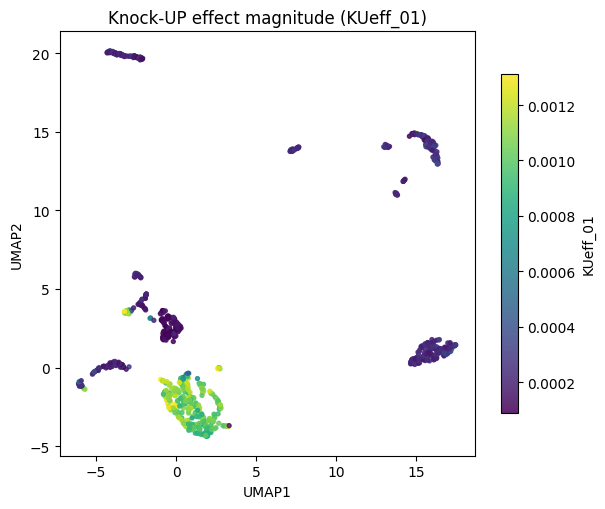

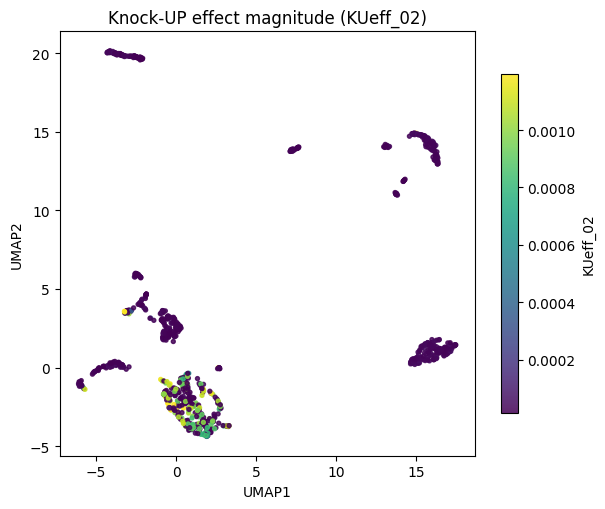

In [8]:
def umap_color_effect(col, title=None):
    v = combined[col].values
    # for such small numbers, still clip to stabilise colour scale
    vmin, vmax = np.percentile(v, [1, 99])

    fig, ax = plt.subplots(figsize=(6.2, 5.2))
    sca = ax.scatter(
        combined["UMAP1"], combined["UMAP2"],
        c=v,
        s=8,
        alpha=0.85,
        vmin=vmin,
        vmax=vmax,
    )
    ax.set_xlabel("UMAP1")
    ax.set_ylabel("UMAP2")
    ax.set_title(title or col)
    cb = plt.colorbar(sca, ax=ax, shrink=0.8)
    cb.set_label(col)
    plt.tight_layout()
    plt.show()

for col in effect_cols:
    umap_color_effect(col, f"Knock-UP effect magnitude ({col})")


In [9]:
if "Condition" in combined.columns and effect_cols:
    print("Mean KU effect (1 - cos sim) by Condition:")
    display(combined.groupby("Condition")[effect_cols].mean())

if "CellType" in combined.columns and effect_cols:
    print("\nTop CellTypes by KU effect:")
    sort_col = effect_cols[0]
    ct_means = combined.groupby("CellType")[effect_cols].mean()
    display(ct_means.sort_values(sort_col, ascending=False).head(10))


Mean KU effect (1 - cos sim) by Condition:


,KUeff_01,KUeff_02
Condition,,
ALS,0.000501,0.000171
PN,0.000506,0.000185



Top CellTypes by KU effect:


,KUeff_01,KUeff_02
CellType,,
L6,0.000645,0.000254
Mural,0.000636,0.000240
Fibro,0.000603,0.000025
Micro,0.000572,0.000204
L5_L6,0.000567,0.000191
5HT3aR,0.000562,0.000202
Endo,0.000546,0.000108
OPC,0.000522,0.000209
L4_L6,0.000516,0.000140


In [10]:
import numpy as np

def centroid_shift(df, group_col="Condition"):
    """Compute centroid per group in UMAP space and their Euclidean distance."""
    centroids = df.groupby(group_col)[["UMAP1", "UMAP2"]].mean()
    print("UMAP centroids:")
    display(centroids)
    if len(centroids) == 2:
        diff = np.linalg.norm(np.diff(centroids.values, axis=0))
        print(f"Centroid distance (ALS vs Control): {diff:.3f}")
    return centroids

centroids = centroid_shift(combined, "Condition")


UMAP centroids:


,UMAP1,UMAP2
Condition,,
ALS,4.474840,3.796266
PN,3.564881,3.863533


Centroid distance (ALS vs Control): 0.912


In [11]:
if "Condition" in combined.columns:
    mean_effects = combined.groupby("Condition")[["KUeff_01", "KUeff_02"]].mean()
    print("Mean knock-up effect by Condition:")
    display(mean_effects)


Mean knock-up effect by Condition:


,KUeff_01,KUeff_02
Condition,,
ALS,0.000501,0.000171
PN,0.000506,0.000185


##### Centroid shift

In [12]:
import numpy as np
import pandas as pd

# Which conditions do we actually have?
print("Condition counts:")
display(combined["Condition"].value_counts())

# Columns that are the high-dimensional embeddings from Geneformer
emb_cols = [c for c in combined.columns if c.startswith("emb_")]
X = combined[emb_cols].values
print("Embedding matrix shape:", X.shape)


Condition counts:


Condition
ALS    596
PN     404
Name: count, dtype: int64

Embedding matrix shape: (1000, 768)


In [13]:
def centroid_shift_umap(df, group_col="Condition"):
    """Compute UMAP centroid per group and pairwise distances."""
    centroids = df.groupby(group_col)[["UMAP1", "UMAP2"]].mean()
    print("UMAP centroids by", group_col)
    display(centroids)

    labels = centroids.index.tolist()
    if len(centroids) == 2:
        d = np.linalg.norm(centroids.iloc[0] - centroids.iloc[1])
        print(f"Euclidean distance between {labels[0]} and {labels[1]} centroids: {d:.3f}")
    return centroids

umap_centroids = centroid_shift_umap(combined, "Condition")


UMAP centroids by Condition


,UMAP1,UMAP2
Condition,,
ALS,4.474840,3.796266
PN,3.564881,3.863533


Euclidean distance between ALS and PN centroids: 0.912


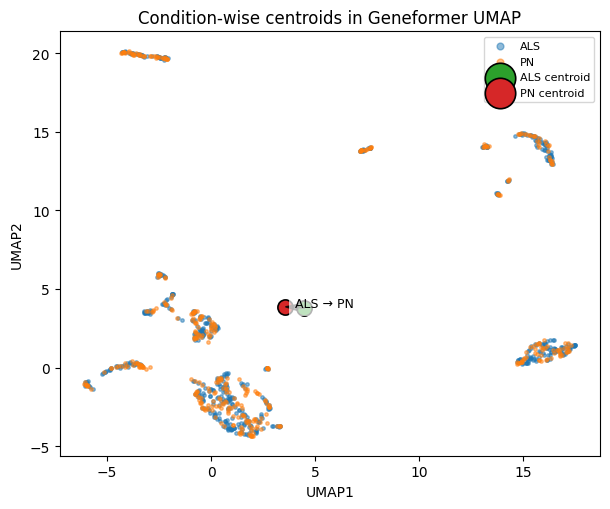

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6.2, 5.2))

# scatter all cells, coloured by Condition
for cond, sub in combined.groupby("Condition"):
    ax.scatter(sub["UMAP1"], sub["UMAP2"], s=6, alpha=0.5, label=cond)

# plot centroids
for cond, row in umap_centroids.iterrows():
    ax.scatter(row["UMAP1"], row["UMAP2"], s=120, edgecolor="k", linewidth=1.2, label=f"{cond} centroid")

# if exactly two conditions, draw arrow between centroids
if len(umap_centroids) == 2:
    (c1, c2) = umap_centroids.index
    p1 = umap_centroids.loc[c1]
    p2 = umap_centroids.loc[c2]
    ax.arrow(
        p1["UMAP1"], p1["UMAP2"],
        (p2["UMAP1"] - p1["UMAP1"]),
        (p2["UMAP2"] - p1["UMAP2"]),
        length_includes_head=True,
        head_width=0.4,
        head_length=0.6,
        color="k",
        alpha=0.8,
    )
    ax.text(
        (p1["UMAP1"] + p2["UMAP1"]) / 2,
        (p1["UMAP2"] + p2["UMAP2"]) / 2,
        f"{c1} → {c2}",
        fontsize=9,
        bbox=dict(facecolor="white", alpha=0.7, edgecolor="none")
    )

ax.set_xlabel("UMAP1")
ax.set_ylabel("UMAP2")
ax.set_title("Condition-wise centroids in Geneformer UMAP")
ax.legend(markerscale=2, fontsize=8, loc="best")
plt.tight_layout()
plt.show()


In [15]:
def centroid_shift_embedding(df, group_col="Condition", emb_cols=None):
    if emb_cols is None:
        emb_cols = [c for c in df.columns if c.startswith("emb_")]
    X = df[emb_cols].values
    groups = df[group_col].values

    centroids = (
        df.groupby(group_col)[emb_cols]
        .mean()
    )
    print("Embedding-space centroids shape:", centroids.shape)

    labels = centroids.index.tolist()
    if len(centroids) == 2:
        d = np.linalg.norm(centroids.iloc[0].values - centroids.iloc[1].values)
        print(f"Euclidean distance (768-D) between {labels[0]} and {labels[1]}: {d:.3f}")
    return centroids

emb_centroids = centroid_shift_embedding(combined, "Condition", emb_cols)


Embedding-space centroids shape: (2, 768)
Euclidean distance (768-D) between ALS and PN: 0.043


In [16]:
from sklearn.cluster import KMeans

# choose a small K; you can adjust
K = 6
kmeans = KMeans(n_clusters=K, random_state=42, n_init="auto")
cluster_labels = kmeans.fit_predict(X)

combined["cluster_kmeans"] = cluster_labels

print("Cluster counts:")
display(combined["cluster_kmeans"].value_counts().sort_index())


Cluster counts:


cluster_kmeans
0    213
1    152
2    122
3    242
4     45
5    226
Name: count, dtype: int64

In [17]:
# cluster x Condition contingency
print("Cluster vs Condition:")
display(pd.crosstab(combined["cluster_kmeans"], combined["Condition"]))

# cluster x CellType (if not too many)
if "CellType" in combined.columns:
    print("\nCluster vs CellType (top 10 CellTypes by count):")
    ct = pd.crosstab(combined["cluster_kmeans"], combined["CellType"])
    # show only top columns for readability
    top_ct = ct.sum().sort_values(ascending=False).head(10).index
    display(ct[top_ct])


Cluster vs Condition:


Condition,ALS,PN
cluster_kmeans,,
0,115,98
1,97,55
2,76,46
3,152,90
4,25,20
5,131,95



Cluster vs CellType (top 10 CellTypes by count):


CellType,Oligo,L2_L3,Astro,L3_L5,OPC,L4_L6,5HT3aR,PV,L5_L6,L6
cluster_kmeans,,,,,,,,,,
0,35,26,23,17,13,12,18,15,12,6
1,26,17,18,14,16,10,2,7,5,5
2,14,14,13,16,9,8,8,9,7,9
3,35,34,27,19,23,16,16,12,10,10
4,6,8,8,3,1,4,1,0,4,1
5,36,28,20,15,20,17,21,10,14,14


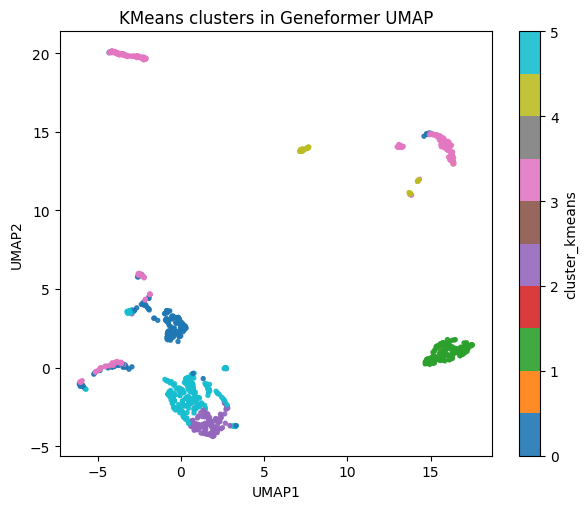

In [18]:
fig, ax = plt.subplots(figsize=(6.2, 5.2))
sca = ax.scatter(
    combined["UMAP1"], combined["UMAP2"],
    c=combined["cluster_kmeans"],
    s=8, alpha=0.9, cmap="tab10"
)
ax.set_xlabel("UMAP1")
ax.set_ylabel("UMAP2")
ax.set_title("KMeans clusters in Geneformer UMAP")
plt.colorbar(sca, ax=ax, label="cluster_kmeans")
plt.tight_layout()
plt.show()


In [19]:
from sklearn.neighbors import NearestNeighbors

# use Geneformer embeddings for neighbourhoods
KNN_K = 16   # 1 self + 15 neighbours
nbrs = NearestNeighbors(n_neighbors=KNN_K, metric="cosine").fit(X)
dist, idx = nbrs.kneighbors(X)

# drop self (first neighbour is the point itself)
nn_idx = idx[:, 1:]
nn_conditions = combined["Condition"].values

# fraction of ALS neighbours per cell
als_label = "ALS"  # adjust if your ALS label string is different
frac_als_nn = (nn_conditions[nn_idx] == als_label).mean(axis=1)

combined["ALS_nn_fraction"] = frac_als_nn
print("ALS_nn_fraction stats:")
display(combined["ALS_nn_fraction"].describe())


ALS_nn_fraction stats:


count    1000.000000
mean        0.608933
std         0.135748
min         0.200000
25%         0.533333
50%         0.600000
75%         0.733333
max         0.933333
Name: ALS_nn_fraction, dtype: float64

In [20]:
print("Mean ALS_nn_fraction by Condition:")
display(combined.groupby("Condition")["ALS_nn_fraction"].mean())


Mean ALS_nn_fraction by Condition:


Condition
ALS    0.611745
PN     0.604785
Name: ALS_nn_fraction, dtype: float64

In [21]:
# define a high-effect subset (top 25% by KUeff_01; adjust as you like)
if "KUeff_01" in combined.columns:
    thr = combined["KUeff_01"].quantile(0.75)
    combined["high_KUeff01"] = combined["KUeff_01"] >= thr
    print("High-effect threshold (KUeff_01):", thr)

    print("\nALS_nn_fraction by high vs low KUeff_01:")
    display(
        combined.groupby("high_KUeff01")["ALS_nn_fraction"].describe()
    )


High-effect threshold (KUeff_01): 0.0009654015302658081

ALS_nn_fraction by high vs low KUeff_01:


,count,mean,std,min,25%,50%,75%,max
high_KUeff01,,,,,,,,
False,750.0,0.606756,0.133073,0.2,0.533333,0.6,0.733333,0.933333
True,250.0,0.615467,0.143554,0.2,0.533333,0.6,0.733333,0.866667


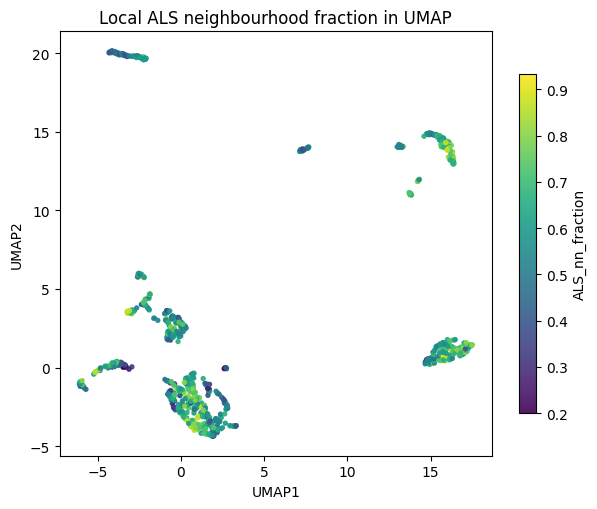

In [22]:
fig, ax = plt.subplots(figsize=(6.2, 5.2))
sca = ax.scatter(
    combined["UMAP1"], combined["UMAP2"],
    c=combined["ALS_nn_fraction"],
    s=8,
    alpha=0.9,
)
ax.set_xlabel("UMAP1")
ax.set_ylabel("UMAP2")
ax.set_title("Local ALS neighbourhood fraction in UMAP")
cb = plt.colorbar(sca, ax=ax, shrink=0.8)
cb.set_label("ALS_nn_fraction")
plt.tight_layout()
plt.show()
